Predict whether a customer will apply discount/ subscription based on behavior.

In [3]:
%pip install pandas numpy scikit-learn

In [4]:
import pandas as pd 

In [5]:
data = pd.read_csv('Customer_details.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Express,1,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Express,1,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,1,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,1,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,1,Yes,31,PayPal,Annually


In [6]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   int64  
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   int64  
 14  Promo Code Used         3900 non-null   

In [10]:
data.shape

(3900, 18)

In [12]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Subscription Status,Discount Applied,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,0.270000,0.430000,25.351538
std,1125.977353,15.207589,23.685392,0.716223,0.444016,0.495139,14.447125
min,1.000000,18.000000,20.000000,2.500000,0.000000,0.000000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,0.000000,0.000000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,0.000000,0.000000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,1.000000,1.000000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,1.000000,1.000000,50.000000


In [15]:
from sklearn.model_selection import train_test_split
features = ['Age','Purchase Amount (USD)','Review Rating','Previous Purchases']
x= data.loc[:,features].values
y_discount = data['Discount Applied']
x_train_discount, x_test_discount,y_train_discount,y_test_discount = train_test_split(
    x, y_discount, test_size = 0.25, random_state = 42, stratify = y_discount
)
y_subscription = data['Subscription Status']
x_train_subscription, x_test_subscription, y_train_subscription,y_test_subscription = train_test_split(
  x,y_subscription, test_size= 0.25, random_state=42, stratify = y_subscription 
)


In [16]:
print(data['Discount Applied'].dtype)
print(data['Discount Applied'].value_counts())

print(data['Subscription Status'].dtype)
print(data['Subscription Status'].value_counts())

int64
Discount Applied
0    2223
1    1677
Name: count, dtype: int64
int64
Subscription Status
0    2847
1    1053
Name: count, dtype: int64


In [18]:
from sklearn.linear_model import LogisticRegression
log_discount = LogisticRegression()
log_discount.fit(x_train_discount, y_train_discount)
y_pred_discount = log_discount.predict(x_test_discount)

log_subscription = LogisticRegression()
log_subscription.fit(x_train_subscription, y_train_subscription)
y_pred_subscription = log_subscription.predict(x_test_subscription)

pro_discount = log_discount.predict_proba(x_test_discount)
pro_subscription = log_subscription.predict_proba(x_test_subscription)

In [19]:
pro_discount

array([[0.6071094 , 0.3928906 ],
       [0.56351687, 0.43648313],
       [0.5654984 , 0.4345016 ],
       ...,
       [0.55232955, 0.44767045],
       [0.55304794, 0.44695206],
       [0.54373702, 0.45626298]], shape=(975, 2))

In [20]:
pro_subscription

array([[0.73311732, 0.26688268],
       [0.70549361, 0.29450639],
       [0.73820036, 0.26179964],
       ...,
       [0.74267074, 0.25732926],
       [0.75479755, 0.24520245],
       [0.75257507, 0.24742493]], shape=(975, 2))

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_discount,y_pred_discount))
print(classification_report(y_test_discount,y_pred_discount))

[[556   0]
 [419   0]]


/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

           0       0.57      1.00      0.73       556
           1       0.00      0.00      0.00       419

    accuracy                           0.57       975
   macro avg       0.29      0.50      0.36       975
weighted avg       0.33      0.57      0.41       975



In [23]:
print(x_train_discount.dtype)
print(x_train_discount[:3])

float64
[[29.  39.   3.8 48. ]
 [62.  23.   4.5 23. ]
 [42.  94.   4.1 21. ]]


In [24]:
print(confusion_matrix(y_test_subscription,y_pred_subscription))
print(classification_report(y_test_subscription,y_pred_subscription))


[[712   0]
 [263   0]]


/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

           0       0.73      1.00      0.84       712
           1       0.00      0.00      0.00       263

    accuracy                           0.73       975
   macro avg       0.37      0.50      0.42       975
weighted avg       0.53      0.73      0.62       975



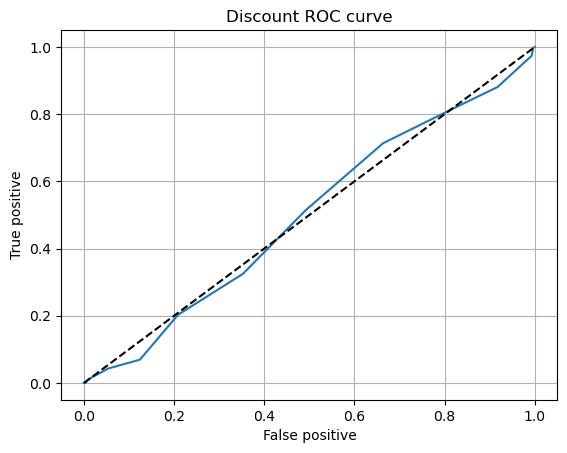

In [25]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(x_train_discount, y_train_discount)
y_proba= classifier.predict_proba(x_test_discount)[:,1]
fpr,tpr,thresholds = roc_curve(y_test_discount,y_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.title('Discount ROC curve')
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.grid(True)
plt.show()

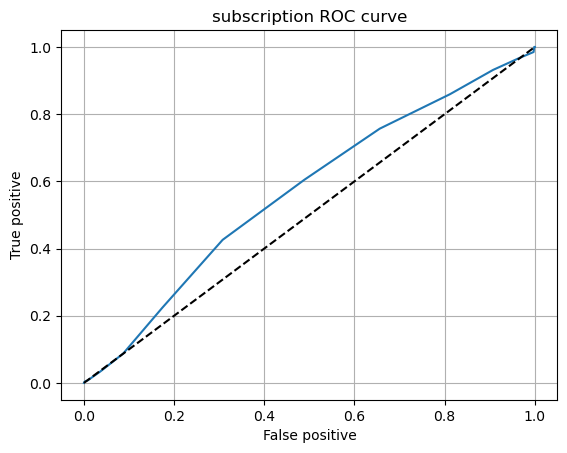

In [26]:
classifier1 = KNeighborsClassifier(n_neighbors=20)
classifier1.fit(x_train_subscription, y_train_subscription)
y_proba1= classifier.predict_proba(x_test_subscription)[:,1]
fpr,tpr,thresholds = roc_curve(y_test_subscription,y_proba1)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.title('subscription ROC curve')
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.grid(True)
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score
auc_discount = roc_auc_score(y_test_discount, y_proba)
print('Discount AUC Score', auc_discount)
auc_subscription = roc_auc_score(y_test_subscription, y_proba1)
print('Subscription AUC Score', auc_subscription)

Discount AUC Score 0.4979353033086657
Subscription AUC Score 0.5682087623360532


## Business Insights
- The current demographic and purchase features show limited predictive power (AUC 0.49 - 0.57), suggesting customer behavior is not strongly driven by these variables alone.
- The model tends to favor the majority class under the default threshold, highlighting the importance of threshold tuning in real marketing applications.
- Additional behavioral data (e.g., browsing activity, engagement frequency, promotion exposure) would likely improve customer targeting performance.